In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement_1.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


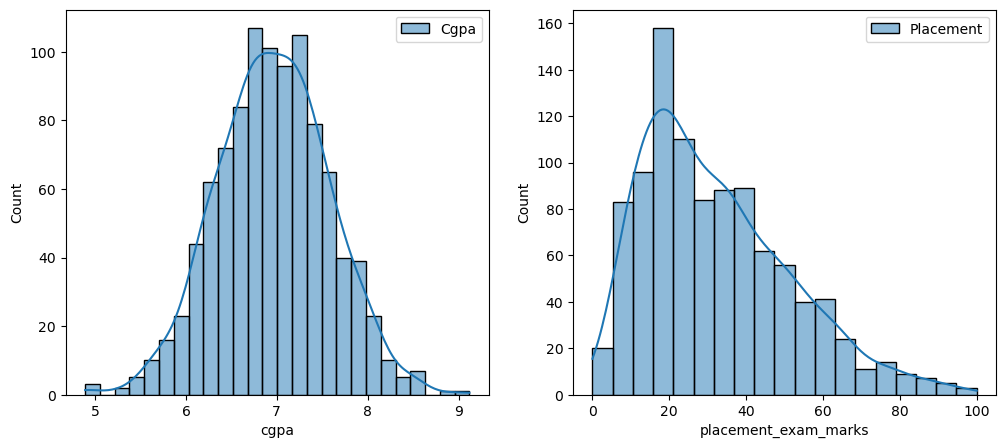

In [4]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

sns.histplot(df['cgpa'], kde=True, label='Cgpa', ax=ax[0])
ax[0].legend()

sns.histplot(df['placement_exam_marks'],kde = True, label = 'Placement',ax=ax[1])
ax[1].legend()

plt.show()

In [5]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

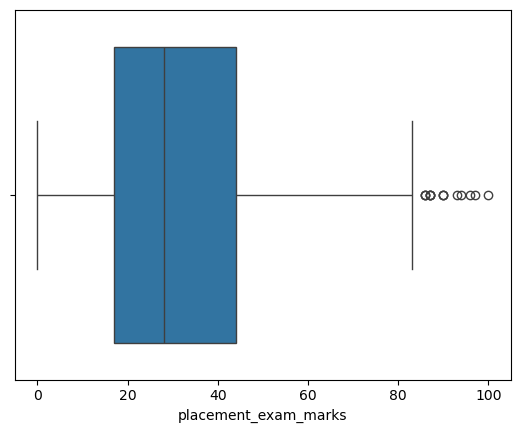

In [6]:
sns.boxplot(df['placement_exam_marks'], orient = 'h')
plt.show()

In [19]:
# Finding the IQR

Q1 = df['placement_exam_marks'].quantile(0.25)
Q3 = df['placement_exam_marks'].quantile(0.75)

In [21]:
print('Q1 = ',Q1)
print('Q3 = ',Q3)

Q1 =  17.0
Q3 =  44.0


In [23]:
IQR = Q3 - Q1
IQR

27.0

In [39]:
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [41]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


## Finding outliers: 

In [44]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [47]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


- ```ekhane ei 15 student holo outliers. ekhon amra trimming kore ederke bad deyar maddhome outliers handle korte pari , OR capping kore outliers er value k onno value diye fill koreo handle korte pari.```

## Trimming 

In [53]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [55]:
new_df 

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


- ```trimming kore 15 ta outliers bad diyechi, ekhon 985 student er data ache.```

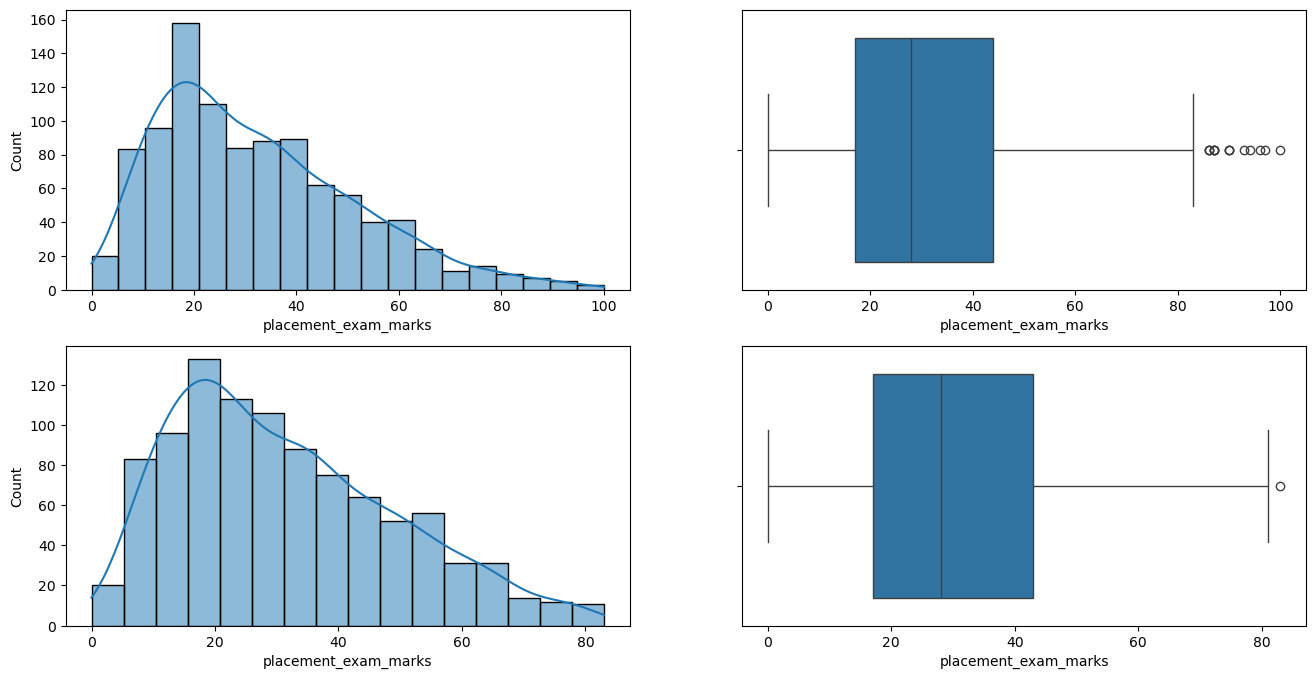

In [64]:
# Comparing , Before and after Trimming.

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'], kde = True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'], orient = 'h')

plt.subplot(2,2,3)
sns.histplot(new_df['placement_exam_marks'], kde = True)

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'], orient = 'h')

plt.show()

## Capping

In [79]:
new_df_cap = df.copy() # ekhane df dataframe ta new_df_cap e copy kore rekhe dilam.

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [81]:
new_df_cap.shape

(1000, 3)

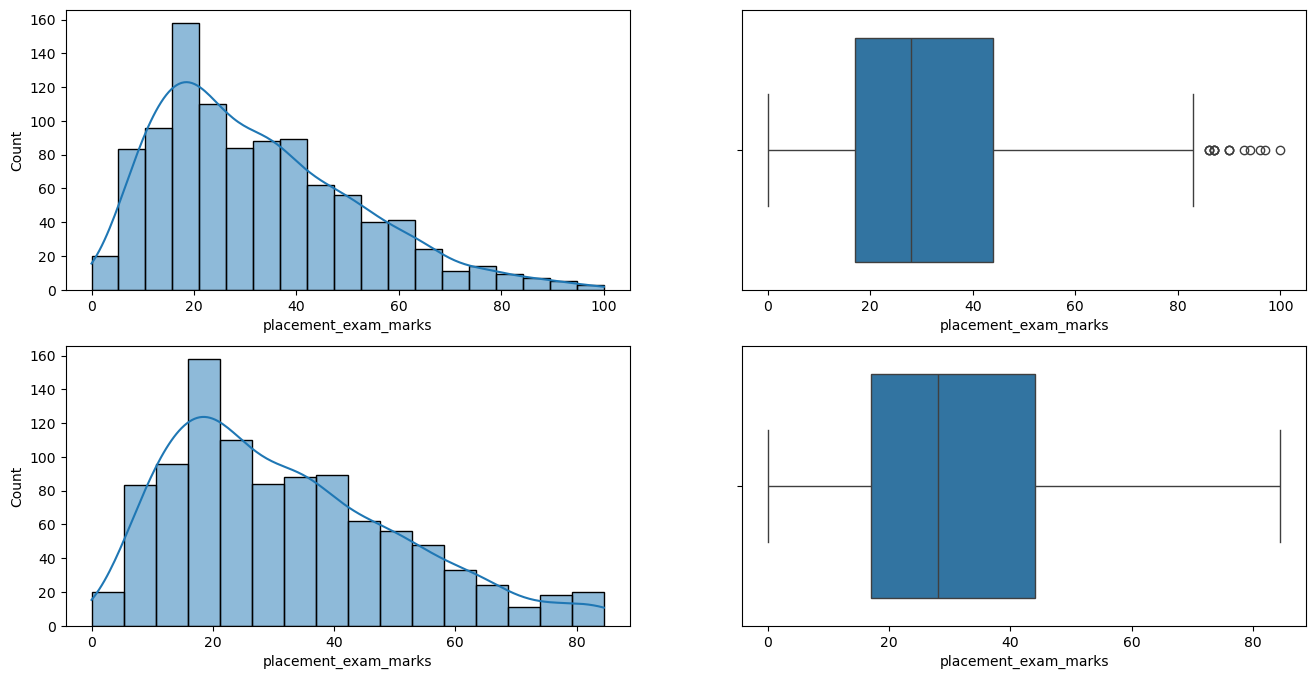

In [83]:
# Comparing , Before and after Capping.

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'], kde = True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'], orient = 'h')

plt.subplot(2,2,3)
sns.histplot(new_df_cap['placement_exam_marks'], kde = True)

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'], orient = 'h')

plt.show()